이 문서는 다음 링크를 기반으로 작성되었습니다.  
https://pandas.pydata.org/docs/#

# What kind of data does pandas handle?

다음과 같이 pandas를 불러와서 사용합니다. 대부분은 pandas를 pd로 줄여서 쓰는 것이 관행입니다.

In [1]:
import pandas as pd

## pandas data table representation

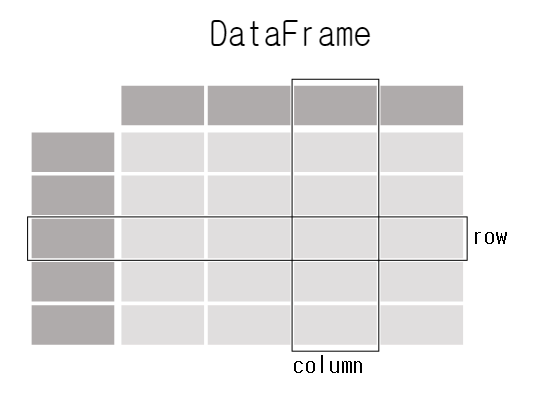

pandas에서는 DataFrame이라는 구조를 주로 사용하며, 이는 Python의 Dictionary와 유사합니다. 아래에서는 Dictionary를 생성 후 pandas.DataFrame을 이용하여 변환하는 예입니다.

In [2]:
data = {'Name': ['Lee', 'Kim', 'Park'],
        'Age': [10, 20, 30],
        'Sex': ['Male', 'Female', 'Male']}
df = pd.DataFrame(data)
df

,Name,Age,Sex
0,Lee,10,Male
1,Kim,20,Female
2,Park,30,Male


## Each column in a DataFrame is a Series

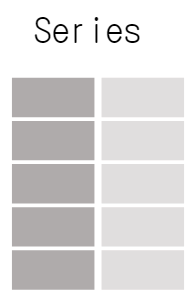

DataFrame의 각 행은 Series입니다. 이는 Python의 배열과 유사하며, DataFrame의 일부를 다음과 같이 불러올 수 있습니다.

In [3]:
df["Age"]

0    10
1    20
2    30
Name: Age, dtype: int64

또는 배열을 선언하여 아래와 같이 Series로 변환할 수 있습니다.

In [4]:
Age = [10, 20, 30]
s = pd.Series(Age, name='Age')
s

0    10
1    20
2    30
Name: Age, dtype: int64

Series의 name을 설정하지 않으면 다음과 같이 이름이 없는 상태로 생성됩니다.

In [5]:
s = pd.Series(Age)
s

0    10
1    20
2    30
dtype: int64

## Do something with a DataFrame or Series

위의 DataFrame에서 나이의 최댓값은 다음과 같이 찾을 수 있습니다.

In [6]:
df["Age"].max()

30

Series에서도 같은 함수로 찾을 수 있습니다.

In [7]:
s.max()

30

df.describe()는 DataFrame의 값에 대한 통계들을 제공합니다.

In [8]:
df.describe()

,Age
count,3.0
mean,20.0
std,10.0
min,10.0
25%,15.0
50%,20.0
75%,25.0
max,30.0


# How do I read and write tabular data?

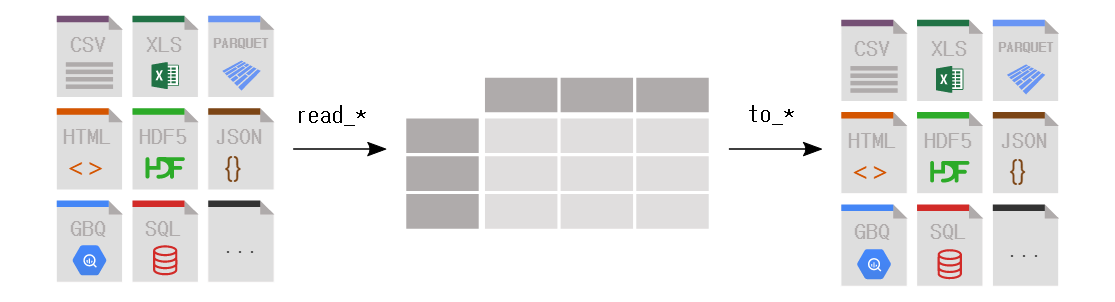

이번에는 csv 파일을 pandas로 읽어보겠습니다. read_csv()를 이용하면 csv 파일을 간단하게 읽을 수 있습니다. 다른 확장자의 경우에도 read_* 를 이용하여 읽을 수 있습니다. 한글이 깨지는 경우에는 encoding을 조절하여 해결 가능합니다.

In [9]:
titanic = pd.read_csv("data/titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


head(n)를 이용하면 상위 n개의 데이터를 볼 수 있습니다. n의 기본 값은 5입니다.

In [10]:
titanic.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


dtypes에는 DataFrame의 열의 데이터 타입이 저장되어 있습니다.

In [11]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

to_excel을 이용하면 DataFrame을 .xlsx 파일로 저장 가능합니다. 파일은 아래 이미지와 같이 저장이 되며 to_* 를 이용해 여러 확장자로 저장할 수 있습니다.  

### **read_csv()**

> excel_write: 저장될 파일명  
sheet_name: 저장될 시트 이름  
index: Index 표시 여부  
parse_date: 날짜/시간이 포함된 경우 이를 날짜/시간 형태에 맞춰 파싱

In [12]:
titanic.to_excel(excel_writer='data/titanic.xlsx', sheet_name='passengers', index=False)

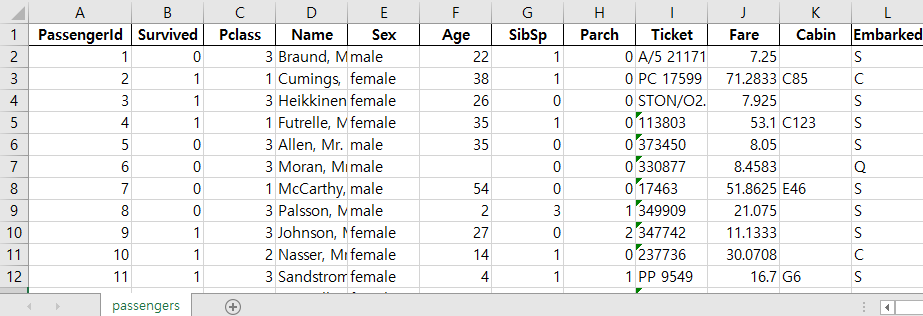

.xlsx 파일은 read_excel()을 이용해서 다시 불러올 수 있습니다.

In [13]:
titanic = pd.read_excel('data/titanic.xlsx', sheet_name='passengers')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# How do I select a subset of a DataFrame?

## How do I select specific columns from a DataFrame?

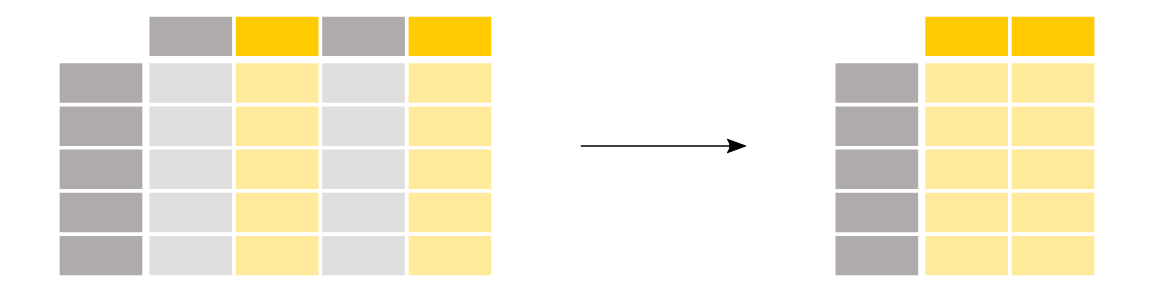

DataFrame의 특정 열은 다음과 같은 코드로 가져올 수 있습니다. 1개의 열만 가져오려면 [ ] 안에 가져올 열 이름을 입력하면 됩니다.

In [14]:
ages = titanic["Age"]
ages.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

이렇게 가져온 데이터는 타입을 확인하면 Series임을 알 수 있습니다.

In [15]:
type(titanic["Age"])

pandas.core.series.Series

그리고 shape 속성을 통해 해당 데이터의 길이, 차원 등 모양에 대한 정보를 알 수 있습니다

In [16]:
titanic["Age"].shape

(891,)

2개 이상의 열에 대한 데이터를 가져오려면 [[ ]]안에 ','로 구분하여 입력해야 합니다.

In [17]:
age_sex = titanic[["Age", "Sex"]]
age_sex.head()

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male


2개 이상의 열에 대한 데이터는 타입이 DataFrame이며, 해당 데이터의 모양도 2차원으로 되어 있음을 알 수 있습니다.

In [18]:
type(titanic[["Age", "Sex"]])

pandas.core.frame.DataFrame

In [19]:
titanic[["Age", "Sex"]].shape

(891, 2)

## How do I filter specific rows from a DataFrame?

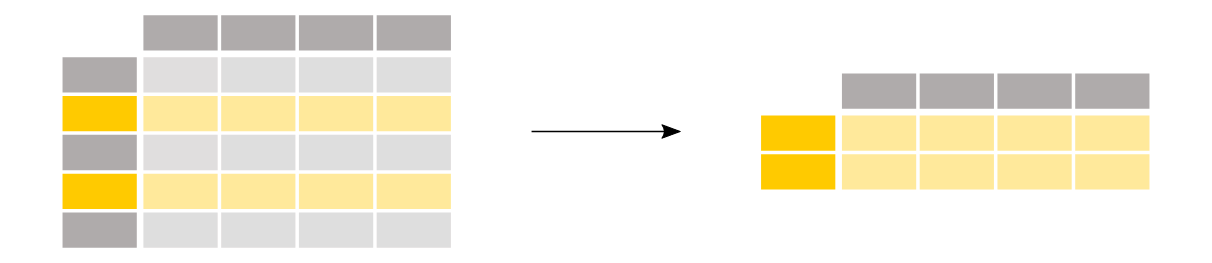

찾고자 하는 데이터를 조건을 이용해 찾는 법입니다. df[ ] 안에 조건을 입력함으로써 데이터들을 전부 찾을 수 있습니다.

In [20]:
above_35 = titanic[titanic["Age"] > 35]
above_35.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


조건은 다음과 같으며 True가 조건에 해당하는 데이터입니다. 이를 [ ] 안에 넣으면 True에 해당하는 Index만 보여줍니다.

In [21]:
titanic["Age"] > 35

0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

shape에는 조건에 해당하는 데이터가 217개이며, 12개의 column으로 이루어진 dataframe이라는 것을 알 수 있습니다.

In [22]:
above_35.shape

(217, 12)

그리고 [ ] 내부에는 '|' 또는 '&' 를 이용하여 조건에 or, and의 논리연산을 추가할 수 있습니다.

In [23]:
class_23_or = titanic[(titanic["Pclass"] == 2) | (titanic["Pclass"] == 3)]
class_23_or.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [24]:
class_23_and = titanic[(titanic["Pclass"] == 2) & (titanic["Pclass"] == 3)]
class_23_and.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


notna()는 해당 column에 해당하는 데이터가 Null 이 아니거나, NaN이 아닌 경우에만 True인 Series를 반환합니다. 

In [25]:
age_no_na = titanic[titanic["Age"].notna()]
age_no_na.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


shape를 보면 Null이 아닌 데이터가 714개로 891개의 원본데이터에 177개의 Null 값이 'Age'에 존재하는 것을 알 수 있습니다.

In [26]:
age_no_na.shape

(714, 12)

iloc[ ]은 numpy slicing과 비슷합니다. dataframe을 2차원 배열로 가정하여 데이터의 원하는 부분만 가져올 수 있습니다.

In [27]:
titanic.iloc[9:25, 2:5]

,Pclass,Name,Sex
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female
10,3,"Sandstrom, Miss. Marguerite Rut",female
11,1,"Bonnell, Miss. Elizabeth",female
12,3,"Saundercock, Mr. William Henry",male
13,3,"Andersson, Mr. Anders Johan",male
14,3,"Vestrom, Miss. Hulda Amanda Adolfina",female
15,2,"Hewlett, Mrs. (Mary D Kingcome)",female
16,3,"Rice, Master. Eugene",male
17,2,"Williams, Mr. Charles Eugene",male
18,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female


아래와 같이 Series를 반환하면, Dataframe에 해당하는 Series의 모든 값을 원하는 값으로 변경 가능합니다. 

In [28]:
titanic.iloc[0:3, 3] = "anonymous"
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,anonymous,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,anonymous,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,anonymous,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# How to create plots in pandas?

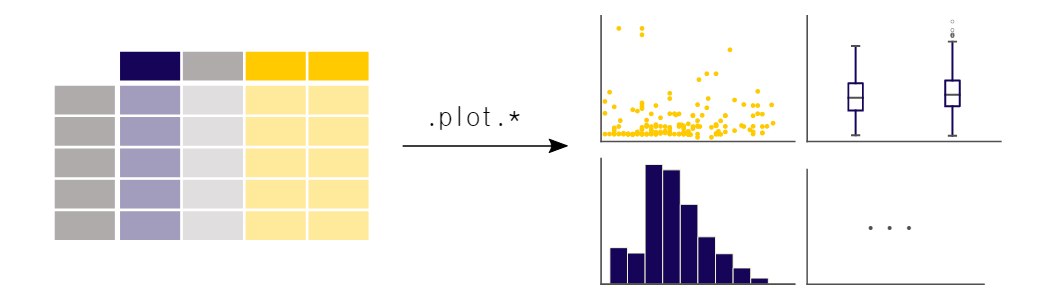

pandas 데이터를 이용해 plot을 그리는 방법입니다. plot을 그리기에 앞서 matplotlib.pyplot을 불러옵니다.

In [29]:
import matplotlib.pyplot as plt

csv 파일을 불러옵니다. index_col=0 으로 데이터의 index를 표시하지 않고, parse_dates를 이용하여 날짜/시간을 형식에 맞춰 파싱합니다.

In [30]:
air_quality = pd.read_csv("data/air_quality_no2.csv", index_col=0, parse_dates=True)
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


pandas는 기본적으로 'bar', 'hist', 'box', 'kde', 'area', 'scatter', 'hexbin', 'pie' plot을 제공합니다.

plot()을 이용해 매우 간단하게 그래프화 할 수 있습니다.

<AxesSubplot:xlabel='datetime'>

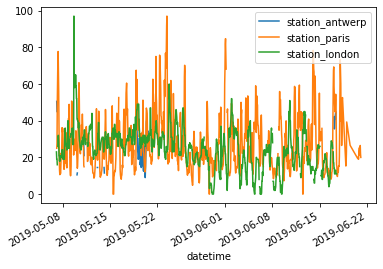

In [31]:
air_quality.plot()

특정 열에 대해서만 도식화하고 싶으면 [ ] 안에 원하는 열의 이름을 넣어서 불러올 수 있습니다.

<AxesSubplot:xlabel='datetime'>

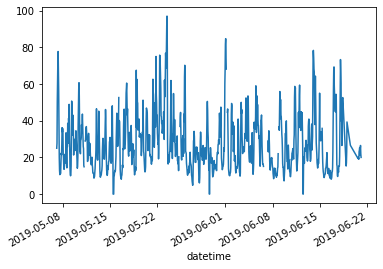

In [32]:
air_quality["station_paris"].plot()

x, y축을 따로 지정하여 도식화하려면 x, y를 해당 열의 이름으로 지정하면 되며, 이를 점으로 표현하려면 plot.scatter()를 사용하면 됩니다. alpha는 투명도를 조절하는 파라미터입니다.

<AxesSubplot:xlabel='station_london', ylabel='station_paris'>

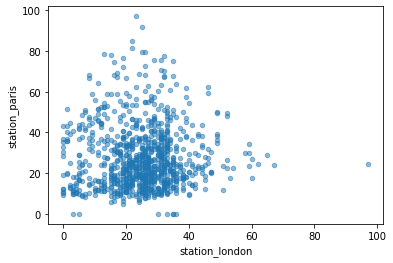

In [33]:
air_quality.plot.scatter(x="station_london",y="station_paris",alpha=0.5)

dir() 는 객체가 가지고 있는 변수와 메소드를 반환하는 함수. 

In [34]:
[method_name for method_name in dir(air_quality.plot)
 if not method_name.startswith("_")]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

plot.box()를 이용해 boxplot을 그리는 방법입니다.

<AxesSubplot:>

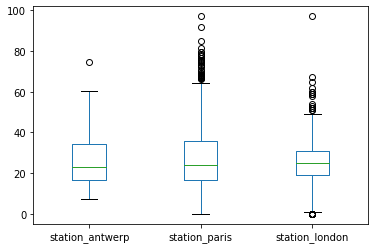

In [35]:
air_quality.plot.box()

subplots을 이용하면 여러 속성들에 대한 그래프를 따로따로 표현할 수 있습니다.

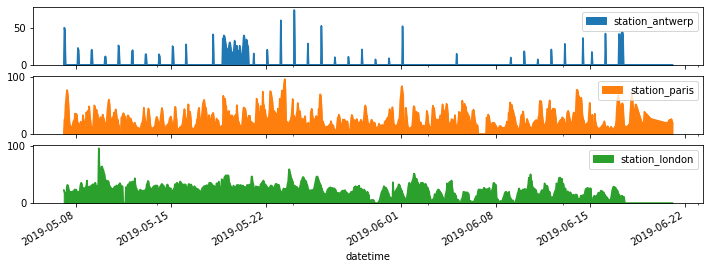

In [36]:
axs = air_quality.plot.area(figsize=(12, 4), subplots=True)

좀더 다양한 커스터마이징을 하려면 matplotlib 을 이용하면 됩니다. pandas의 plot 객체는 matplotlib 객체이므로 옵션을 공유하기 때문에 이를 이용해 설정을 할 수 있습니다.
 또 savefig()를 이용해서 그래프를 저장할 수 있습니다.

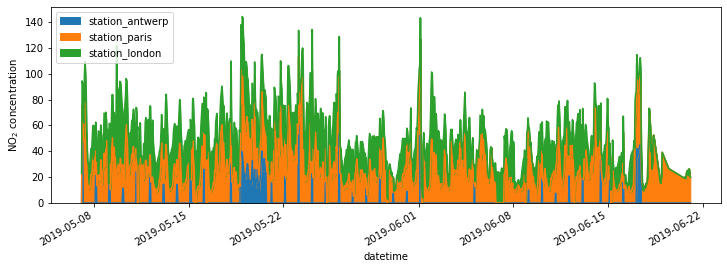

In [37]:
fig, axs = plt.subplots(figsize=(12, 4));
air_quality.plot.area(ax=axs);
axs.set_ylabel("NO$_2$ concentration");
fig.savefig("no2_concentrations.png")

# How to create new columns derived from existing columns?

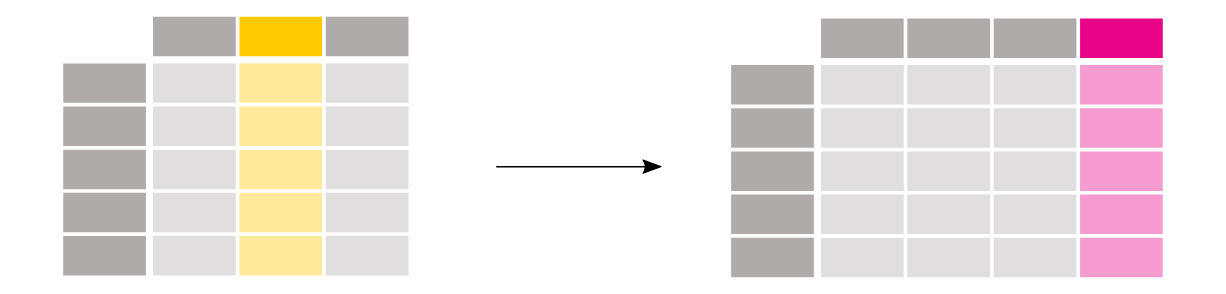

기존 데이터를 이용해 새로운 데이터를 만들려면 다음과 같이 작성하면 됩니다. 0이나 1같은 고정된 값을 넣으려면 '='의 우측에 0 또는 1을 넣으면 됩니다.

In [38]:
air_quality["london_mg_per_cubic"] = air_quality["station_london"] * 1.882
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic
datetime,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286
2019-05-07 03:00:00,50.5,25.0,19.0,35.758
2019-05-07 04:00:00,45.0,27.7,19.0,35.758
2019-05-07 05:00:00,NaN,50.4,16.0,30.112
2019-05-07 06:00:00,NaN,61.9,NaN,NaN


In [39]:
air_quality["ratio_paris_antwerp"] = air_quality["station_paris"] / air_quality["station_antwerp"]
air_quality.head()

,station_antwerp,station_paris,station_london,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


rename()를 이용하면 열의 이름을 변경할 수 있습니다.

In [40]:
air_quality_renamed = air_quality.rename(
    columns={"station_antwerp": "BETR801",
             "station_paris": "FR04014",
             "station_london": "London Westminster"})
air_quality_renamed.head()

,BETR801,FR04014,London Westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


열의 이름을 매핑하는 것은 방법이 제한되어 있지 않으며 함수를 이용해 변경할 수 있습니다. 아래는 str.lower를 이용해 소문자로 변경하는 예시입니다.

In [41]:
air_quality_renamed = air_quality_renamed.rename(columns=str.lower)
air_quality_renamed.head()

,betr801,fr04014,london westminster,london_mg_per_cubic,ratio_paris_antwerp
datetime,,,,,
2019-05-07 02:00:00,NaN,NaN,23.0,43.286,NaN
2019-05-07 03:00:00,50.5,25.0,19.0,35.758,0.495050
2019-05-07 04:00:00,45.0,27.7,19.0,35.758,0.615556
2019-05-07 05:00:00,NaN,50.4,16.0,30.112,NaN
2019-05-07 06:00:00,NaN,61.9,NaN,NaN,NaN


# How to calculate summary statistics?

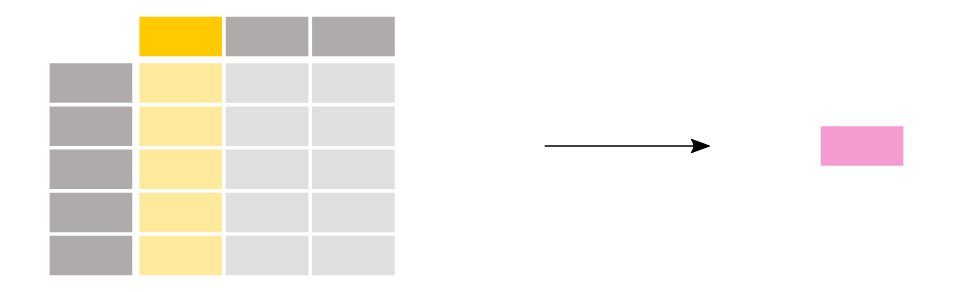

mean()을 이용해 타이타닉 탑승자의 평균 나이를 구할 수 있습니다.

In [42]:
titanic["Age"].mean()

29.69911764705882

median()은 전체 데이터 중 가운데에 있는 값을 알려줍니다. 직원들의 평균 연봉이 3천만원인데 사장의 연봉이 10억인 경우 전체 평균 연봉이 큰 폭으로 오르게 되는데, 이처럼 극단적인 값이 있는 경우 평균값보다 유용합니다.

In [43]:
titanic[["Age", "Fare"]].median()

Age     28.0000
Fare    14.4542
dtype: float64

describe()를 이용하면 mean()과 median() 뿐만 아니라 더 많은 통계를 알 수 있습니다.

In [44]:
titanic[["Age", "Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


## Aggregating statistics grouped by category

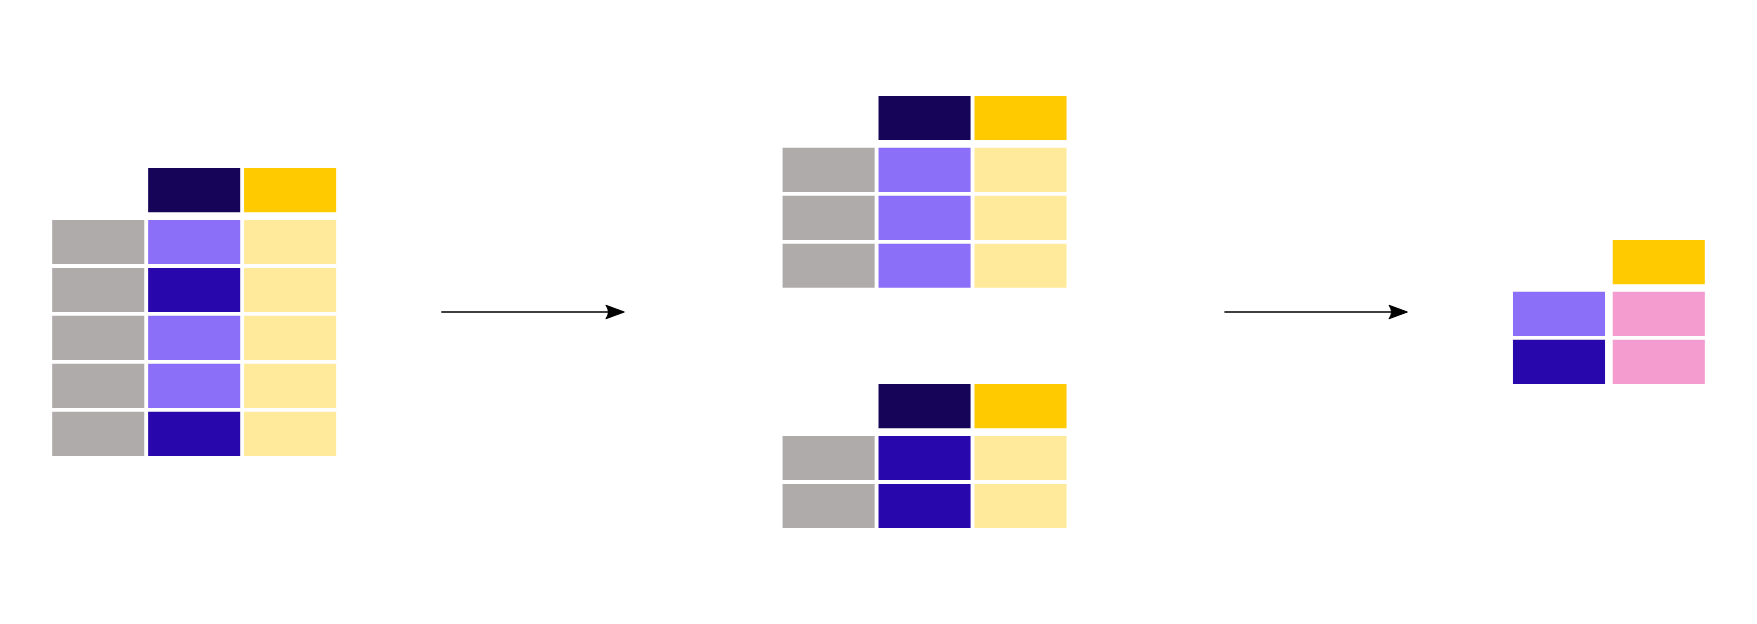

데이터를 그룹별로 나눠서 값을 구할 수 있습니다.  
아래 코드는 성별로 데이터를 나눠서 나이의 평균을 구하는 코드입니다.

In [45]:
titanic[["Sex", "Age"]].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


위처럼 특정 열을 지정하지 않은 경우 전체 데이터에 대해 그룹화합니다.

In [46]:
titanic.groupby("Sex").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


아래 코드는 그룹화 된 값들 중 "Age"에 해당하는 값에 대해서만 평균을 구하는 방법입니다. 해당 방법은 dataframe이 아닌 series를 반환하므로 위의 방법을 추천합니다.

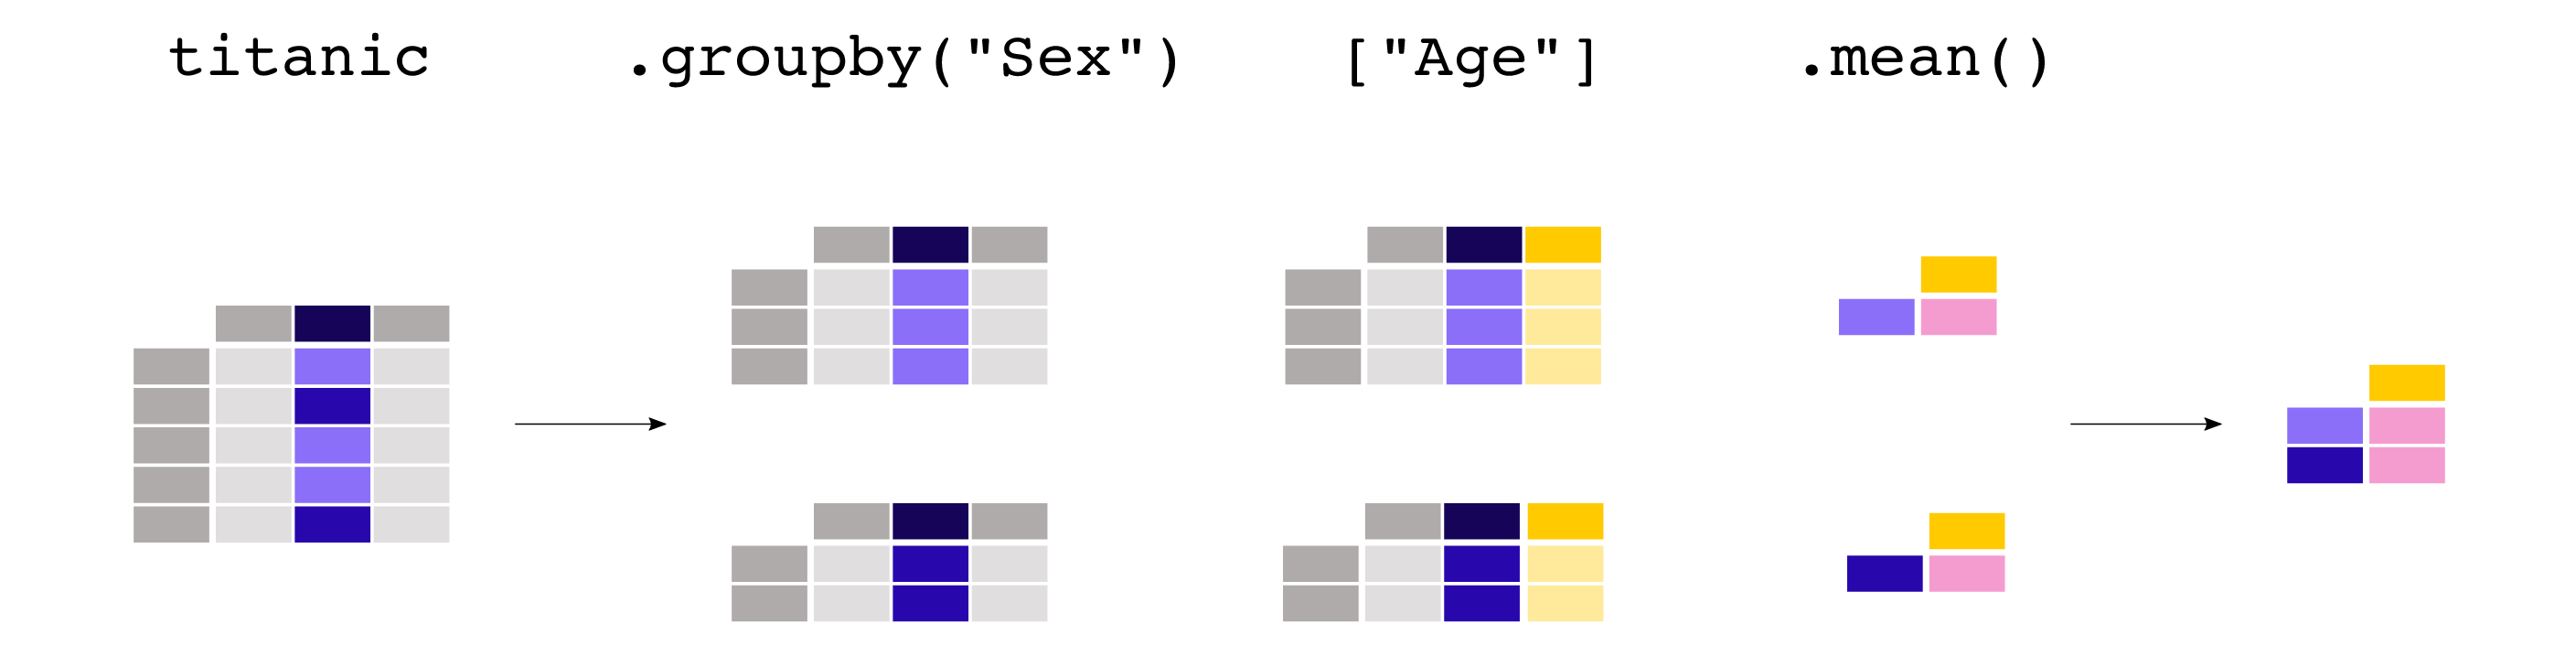

In [47]:
titanic.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

 데이터를 성별로 나눈 후 Pclass 별로 나눈 뒤 Fare의 평균값을 구하는 방법입니다.

In [48]:
titanic.groupby(["Sex", "Pclass"])["Fare"].mean()

Sex     Pclass
female  1         106.125798
        2          21.970121
        3          16.118810
male    1          67.226127
        2          19.741782
        3          12.661633
Name: Fare, dtype: float64

## Count number of records by category

해당 열에 존재하는 값의 개수를 세려면 value_counts()를 사용하면 됩니다.

In [49]:
titanic["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

아래 방법은 위와 같은 결과를 보여주지만, groupby를 이용하는 방법입니다.

In [50]:
titanic.groupby("Pclass")["Pclass"].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

# How to reshape the layout of tables?

데이터를 다른 모양으로 바꾸는 방법에 대한 내용입니다.

## Sort table row

타이타닉 탑승객 데이터를 탑승객의 나이에 따라 정렬하는 방법입니다. sort_values()를 이용하여 간단하게 정렬 할 수 있습니다.

In [51]:
titanic.sort_values(by="Age").head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


아래 방법은 먼저 Pclass에 따라 정렬한 후 같은 값이면 Age를 기준으로 정렬하는 내용입니다. ascending=False 인 경우 내림차순으로 정렬합니다.

In [52]:
titanic.sort_values(by=['Pclass', 'Age'], ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S


## Long to wide table format

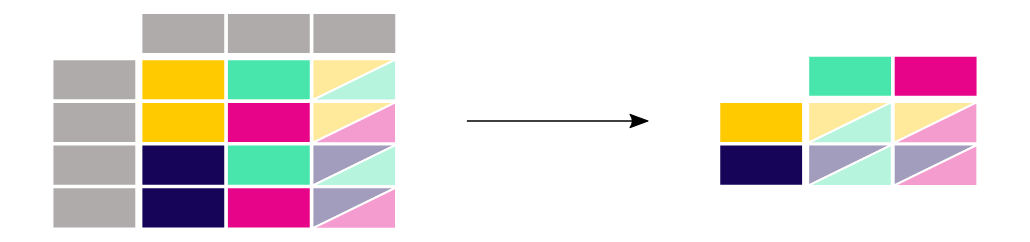

대기 질을 나타내는 데이터를 정리해보겠습니다. 

In [53]:
air_quality = pd.read_csv("data/air_quality_long.csv",
                          index_col="date.utc", 
                          parse_dates=True)

In [54]:
no2 = air_quality[air_quality["parameter"] == "no2"]

 하단 코드는 순서대로 해석하면 됩니다. 데이터를 먼저 정렬하고, 정렬된 데이터를 위치별로 묶고, 위치별로 묶인 데이터의 상단 2개만 표시하겠다는 의미입니다.

In [55]:
no2_subset = no2.sort_index().groupby(["location"]).head(2)
no2_subset

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,µg/m³
2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,µg/m³
2019-04-09 02:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³
2019-04-09 02:00:00+00:00,Antwerpen,BE,BETR801,no2,53.5,µg/m³
2019-04-09 02:00:00+00:00,Paris,FR,FR04014,no2,27.4,µg/m³
2019-04-09 03:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³


pivot()을 이용하여 데이터를 가져와보겠습니다. columns에 분류에 쓰일 속성명을 넣고, values에 표시할 속성명을 넣으면 Index인 시간에 따른 지역별 수치들을 확인 할 수 있습니다.

In [56]:
no2_subset.pivot(columns="location", values="value")

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,NaN,NaN,67.0


Pandas는 여러 속성을 가진 데이터에 대해서 Index에 따라 도식화 할 수 있는 plot() 함수를 제공하기 때문에 pivot() 데이터도 즉시 도식화 할 수 있습니다.

<AxesSubplot:xlabel='date.utc'>

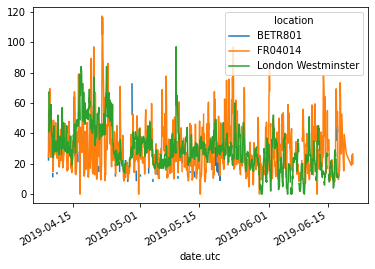

In [57]:
no2.pivot(columns="location", values="value").plot()

## Pivot table

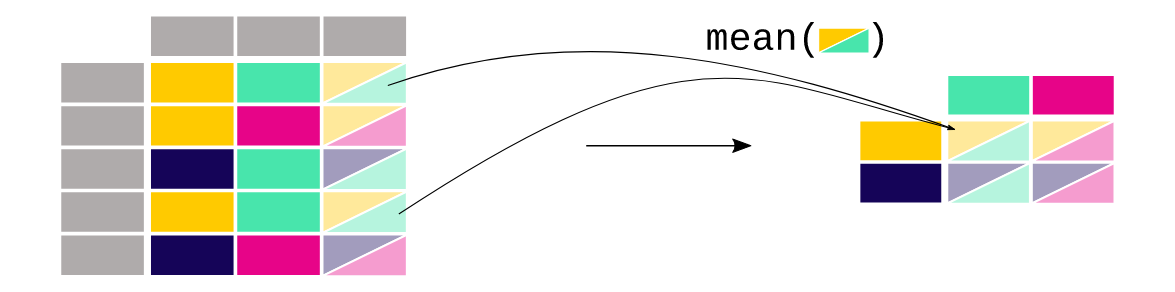

지역 별, 종류 별 평균 농도를 구하려면 pivot_table()을 이용하면 됩니다.
위에서 사용한 pivot()에서는 no2에 대해서만 수치를 구할 수 있었지만, pivot_table()을 사용하면 여러 입자에 대해서 수치를 구할 수 있으며, index="location"를 설정하여 Index를 위치 별로 나타낼 수 있습니다.

In [58]:
air_quality.pivot_table(values="value", 
                        index="location",
                        columns="parameter", 
                        aggfunc="mean")

parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


그리고 piviot_table()에서 margins=True를 설정하면 각각의 위치별 입자 평균 농도에 대한 것 뿐만 아니라 해당 columns에 대해 전부 aggfunc를 적용하여 수치를 구할 수도 있습니다.

In [59]:
air_quality.pivot_table(values="value", 
                        index="location",
                        columns="parameter", 
                        aggfunc="mean",
                        margins=True)

parameter,no2,pm25,All
location,,,
BETR801,26.950920,23.169492,24.982353
FR04014,29.374284,NaN,29.374284
London Westminster,29.740050,13.443568,21.491708
All,29.430316,14.386849,24.222743


## Wide to long format

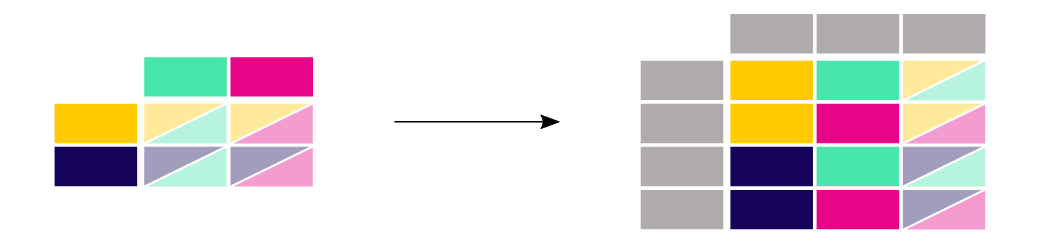

In [60]:
no2.pivot(columns="location", values="value").head()

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,54.5,34.2,67.0
2019-04-09 04:00:00+00:00,34.5,48.5,41.0
2019-04-09 05:00:00+00:00,46.5,59.5,41.0


Wide 형식에서 long 형식으로 변환하는 법에 대한 내용입니다.
reset_index()를 사용하면 속성명을 한줄로 만들어서 반환합니다.

In [61]:
no2_pivoted = no2.pivot(columns="location", values="value").reset_index()
no2_pivoted.head()

location,date.utc,BETR801,FR04014,London Westminster
0,2019-04-09 01:00:00+00:00,22.5,24.4,NaN
1,2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2,2019-04-09 03:00:00+00:00,54.5,34.2,67.0
3,2019-04-09 04:00:00+00:00,34.5,48.5,41.0
4,2019-04-09 05:00:00+00:00,46.5,59.5,41.0


위에서 반환된 데이터를 melt()를 이용해 날짜에 따라서 다시 분류를 해줍니다. "data.utc"만 Index로 이용하고 나머지 속성명은 값의 분류에 이용됩니다.

In [62]:
no_2 = no2_pivoted.melt(id_vars="date.utc")
no_2.head()

,date.utc,location,value
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


pandas.melt() 함수는 좀 더 상세하게 정의 할 수 있습니다.

**pandans.melt()**
> value_var: value 의 소분류를 정합니다.  
value_name: value의 속성명을 정합니다.  
var_name: 소분류의 속성명을 정합니다.

In [63]:
no_2 = no2_pivoted.melt(id_vars="date.utc",
                        value_vars=["BETR801",
                                    "FR04014",
                                    "London Westminster"],
                        value_name="NO_2",
                        var_name="id_location")
no_2.head()

,date.utc,id_location,NO_2
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


## How to combine data from multiple tables?

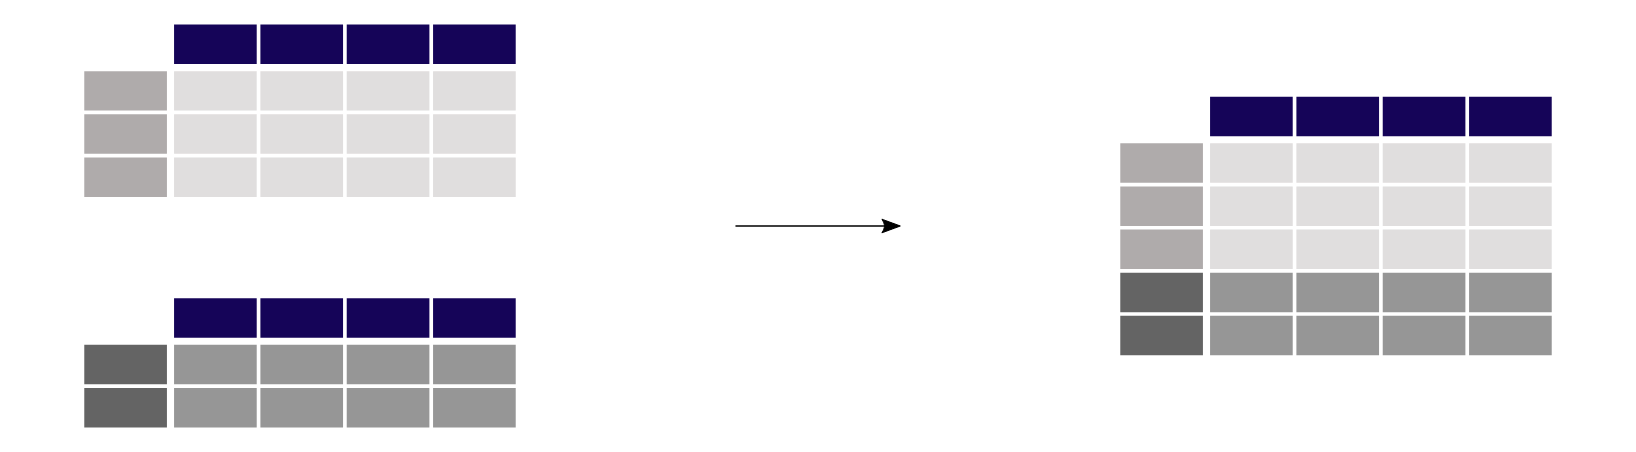

여기서는 두 테이블을 하나로 합치는 방법에 대해서 얘기합니다.

In [64]:
air_quality_no2 = pd.read_csv("data/air_quality_no2_long.csv", parse_dates=True)
air_quality_no2.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [65]:
air_quality_pm25 = pd.read_csv("data/air_quality_pm25_long.csv",parse_dates=True)
air_quality_pm25.head()

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³


위의 유사한 두 테이블을 하나로 합치는 방법입니다. 두 테이블은 같은 속성명들을 가지고 있습니다. axis를 이용해 병합 할 방향을 정할 수 있습니다.

axis=0 : 수직 병합  
axis=1 : 수평 병합

In [66]:
air_quality = pd.concat([air_quality_pm25, air_quality_no2], axis=0)
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³


date.utc 를 기준으로 정렬하는 예입니다. 좌측에 Index가 표시되어 원본 데이터에서 몇번째인지 확인 할 수 있습니다.

In [67]:
air_quality = air_quality.sort_values("date.utc")
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
2067,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³
1003,Paris,FR,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,µg/m³
100,Antwerpen,BE,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5,µg/m³
1098,Antwerpen,BE,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,µg/m³
1109,London,GB,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0,µg/m³


두 테이블을 합치는 함수인 concat() 의 파라미터로 keys를 입력하면 합쳐진 테이블내의 두 테이블을 따로 식별 할 수 있게 key가 생성됩니다.

In [68]:
air_quality_ = pd.concat([air_quality_pm25, air_quality_no2],keys=["PM25", "NO2"])
air_quality_.head()

city country                   date.utc location parameter  \
PM25 0  Antwerpen      BE  2019-06-18 06:00:00+00:00  BETR801      pm25   
     1  Antwerpen      BE  2019-06-17 08:00:00+00:00  BETR801      pm25   
     2  Antwerpen      BE  2019-06-17 07:00:00+00:00  BETR801      pm25   
     3  Antwerpen      BE  2019-06-17 06:00:00+00:00  BETR801      pm25   
     4  Antwerpen      BE  2019-06-17 05:00:00+00:00  BETR801      pm25   

        value   unit  
PM25 0   18.0  µg/m³  
     1    6.5  µg/m³  
     2   18.5  µg/m³  
     3   16.0  µg/m³  
     4    7.5  µg/m³

# Join tables using a common identifier

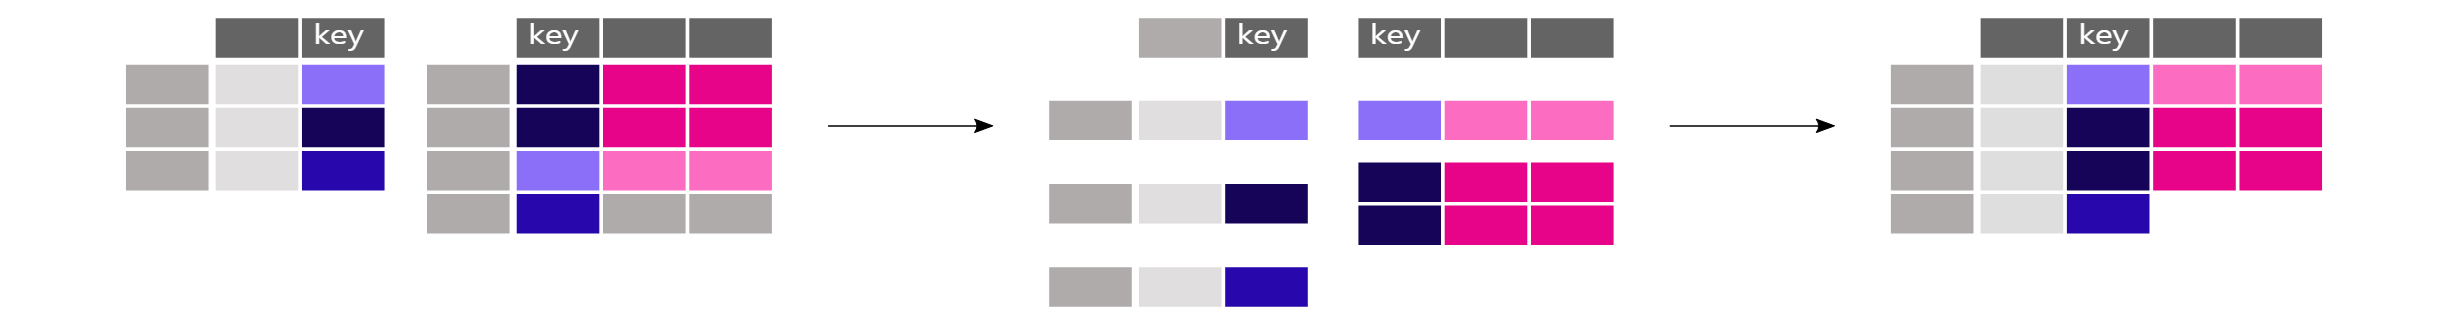

두 테이블에 같은 속성이 존재하면, 해당 값을 키로 두 테이블을 병합 할 수 있습니다.

In [69]:
stations_coord = pd.read_csv("data/air_quality_stations.csv")
stations_coord.head()

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226


In [70]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
2067,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³
1003,Paris,FR,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,µg/m³
100,Antwerpen,BE,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5,µg/m³
1098,Antwerpen,BE,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,µg/m³
1109,London,GB,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0,µg/m³


In [71]:
air_quality = pd.merge(air_quality, stations_coord, how='left', on='location')
air_quality.head()

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
0,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³,51.49467,-0.13193
1,Paris,FR,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,µg/m³,48.83724,2.39390
2,Paris,FR,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,µg/m³,48.83722,2.39390
3,Antwerpen,BE,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5,µg/m³,51.20966,4.43182
4,Antwerpen,BE,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,µg/m³,51.20966,4.43182


아래의 예는 테이블에서 해당하는 데이터에 추가적인 설명이 필요한 경우 데이터 형식으로 다음과 같이 추가 할 수 있습니다. merge() 함수를 사용해서 간단히 생성 가능합니다.

__merge(a, b)__
> a: 추가할 테이블  
b: 추가될 테이블
how: 추가할 방향  
>> 각 테이블의 공통 속성을 가진 열이 속성명이 다른 경우, 각 테이블의 속성명을 따로 씁니다.  
left_on: 좌측 테이블에서 기준이 될 속성명  
right_on: 우측 테이블에서 기준이 될 속성명

In [72]:
air_quality_parameters = pd.read_csv("data/air_quality_parameters.csv")
air_quality_parameters.head()

,id,description,name
0,bc,Black Carbon,BC
1,co,Carbon Monoxide,CO
2,no2,Nitrogen Dioxide,NO2
3,o3,Ozone,O3
4,pm10,Particulate matter less than 10 micrometers in...,PM10


In [73]:
air_quality = pd.merge(air_quality, air_quality_parameters, 
                       how='left', 
                       left_on='parameter', 
                       right_on='id')
air_quality.head()

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude,id,description,name
0,London,GB,2019-05-07 01:00:00+00:00,London Westminster,no2,23.0,µg/m³,51.49467,-0.13193,no2,Nitrogen Dioxide,NO2
1,Paris,FR,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,µg/m³,48.83724,2.39390,no2,Nitrogen Dioxide,NO2
2,Paris,FR,2019-05-07 01:00:00+00:00,FR04014,no2,25.0,µg/m³,48.83722,2.39390,no2,Nitrogen Dioxide,NO2
3,Antwerpen,BE,2019-05-07 01:00:00+00:00,BETR801,pm25,12.5,µg/m³,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
4,Antwerpen,BE,2019-05-07 01:00:00+00:00,BETR801,no2,50.5,µg/m³,51.20966,4.43182,no2,Nitrogen Dioxide,NO2


# How to handle time series data with ease?

In [74]:
air_quality = pd.read_csv("data/air_quality_no2_long.csv")
air_quality = air_quality.rename(columns={"date.utc": "datetime"})
air_quality.head()

,city,country,datetime,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


## Using pandas datetime properties

to_datatime()을 이용하면 dtype 이 object -> datatime 으로 변경됩니다.

In [75]:
air_quality["datetime"] = pd.to_datetime(air_quality["datetime"])
air_quality["datetime"]

0      2019-06-21 00:00:00+00:00
1      2019-06-20 23:00:00+00:00
2      2019-06-20 22:00:00+00:00
3      2019-06-20 21:00:00+00:00
4      2019-06-20 20:00:00+00:00
                  ...           
2063   2019-05-07 06:00:00+00:00
2064   2019-05-07 04:00:00+00:00
2065   2019-05-07 03:00:00+00:00
2066   2019-05-07 02:00:00+00:00
2067   2019-05-07 01:00:00+00:00
Name: datetime, Length: 2068, dtype: datetime64[ns, UTC]

아니면 데이터를 읽어 올 때 parse_dates를 추가하여 바로 적용 할 수 있습니다.

In [76]:
air_quality = pd.read_csv("data/air_quality_no2_long.csv", parse_dates=["date.utc"])
air_quality = air_quality.rename(columns={"date.utc": "datetime"})

min()과 max()를 이용하면 데이터의 시작일과 종료일을 알 수 있습니다.

In [77]:
air_quality["datetime"].min(), air_quality["datetime"].max()

(Timestamp('2019-05-07 01:00:00+0000', tz='UTC'),
 Timestamp('2019-06-21 00:00:00+0000', tz='UTC'))

max() - min() 연산도 가능합니다. 이는 데이터 형식을 변환해야만 가능하며, 하지 않으면 str을 빼는 연산이라 에러가 납니다.

In [78]:
air_quality["datetime"].max() - air_quality["datetime"].min()

Timedelta('44 days 23:00:00')

dataframe에 'month'를 추가하려면 기존 datetime에서 month만 가져와서 추가 할 수있습니다.

In [79]:
air_quality["month"] = air_quality["datetime"].dt.month
air_quality.head()

,city,country,datetime,location,parameter,value,unit,month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,6
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,6
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,6
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,6
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,6


dt.* 는 groupby에도 사용 될 수 있습니다. 년, 월, 일, 요일, 시간 등 다양한 속성을 포함하고 있으며, 아래의 예시는 요일에 따라 지역 별 평균 농도를 나타낸 예입니다.

In [80]:
air_quality.groupby([air_quality["datetime"].dt.weekday, "location"])["value"].mean()

datetime  location          
0         BETR801               27.875000
          FR04014               24.856250
          London Westminster    23.969697
1         BETR801               22.214286
          FR04014               30.999359
          London Westminster    24.885714
2         BETR801               21.125000
          FR04014               29.165753
          London Westminster    23.460432
3         BETR801               27.500000
          FR04014               28.600690
          London Westminster    24.780142
4         BETR801               28.400000
          FR04014               31.617986
          London Westminster    26.446809
5         BETR801               33.500000
          FR04014               25.266154
          London Westminster    24.977612
6         BETR801               21.896552
          FR04014               23.274306
          London Westminster    24.859155
Name: value, dtype: float64

아래는 시간대별로 미세먼지의 평균 농도를 나타낸 그래프입니다. df.plot()을 이용해 간단히 표현 가능하며 rot=0 은 rotation 의 약자로 xlabel을 얼마나 회전시킬 것인지에 대한 값입니다.

Text(0, 0.5, '$NO_2 (µg/m^3)$')

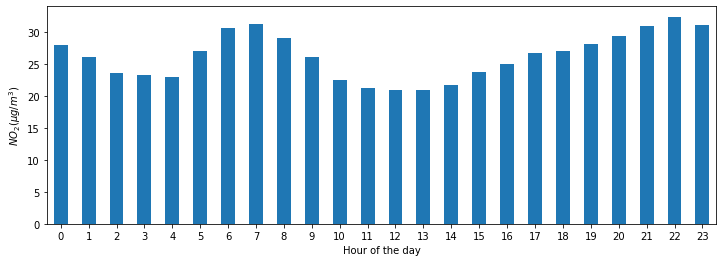

In [81]:
fig, axs = plt.subplots(figsize=(12, 4))
air_quality.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(kind='bar',
                                                                          rot=0,
                                                                          ax=axs)
plt.xlabel("Hour of the day")
plt.ylabel("$NO_2 (µg/m^3)$")

## Datetime as index

datetime 을 index로 사용한 예입니다. 

In [82]:
no_2 = air_quality.pivot(index="datetime", columns="location", values="value")
no_2.head()

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-07 01:00:00+00:00,50.5,25.0,23.0
2019-05-07 02:00:00+00:00,45.0,27.7,19.0
2019-05-07 03:00:00+00:00,NaN,50.4,19.0
2019-05-07 04:00:00+00:00,NaN,61.9,16.0
2019-05-07 05:00:00+00:00,NaN,72.4,NaN


index에 datetime이 저장되어 있기 때문에, df.index로 인덱스를 불러 올 수 있습니다. index가 datetime 형식이면 df.index.year, df.index.weekday 로 년도나 요일만 불러 올 수 있습니다.

In [83]:
no_2.index.year, no_2.index.weekday

(Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
             ...
             2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
            dtype='int64', name='datetime', length=1033),
 Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             ...
             3, 3, 3, 3, 3, 3, 3, 3, 3, 4],
            dtype='int64', name='datetime', length=1033))

index가 datetime 형식인 경우 아래와 같이 시간 없이 날짜만 지정하면 해당 날짜에 해당하는 모든 값들을 가지고 도식화합니다.

<AxesSubplot:xlabel='datetime'>

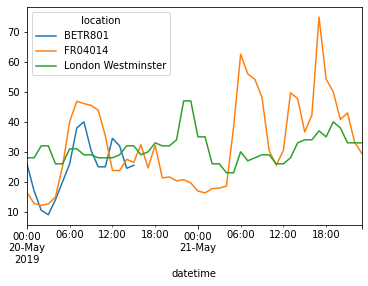

In [84]:
no_2["2019-05-20":"2019-05-21"].plot()

## Resample a time series to another frequency

resample() 은 groupby() 와 비슷합니다. datetime 형식의 속성이 있으면 해당 속성을 원하는 시간 범위에 따라 그룹화합니다. 분은 T, 시간은 H, 일은 D, 주일은 W, 달은 M, 년은 Y를 이용해서 그룹화 할 수 있습니다.  
아래의 코드는 데이터를 한달씩 나눠서 그룹화하고, 그룹화된 데이터 중 최댓값을 가져온 코드입니다.

In [85]:
monthly_max = no_2.resample("M").max()
monthly_max

location,BETR801,FR04014,London Westminster
datetime,,,
2019-05-31 00:00:00+00:00,74.5,97.0,97.0
2019-06-30 00:00:00+00:00,52.5,84.7,52.0


df.index.freq를 이용하면 데이터의 통계 기준이 무엇인지 알 수 있습니다.

In [86]:
monthly_max.index.freq

<MonthEnd>

이번에는 날짜 별 평균을 그래프로 나타내는 코드입니다.

<AxesSubplot:xlabel='datetime'>

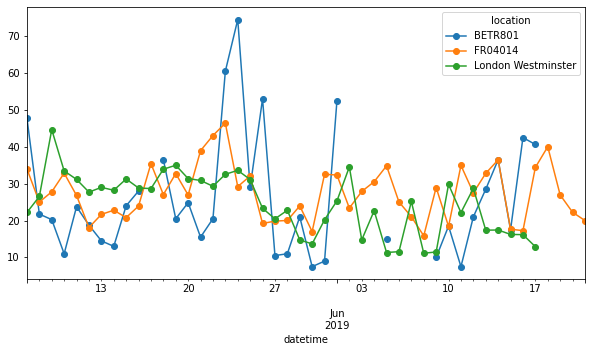

In [87]:
no_2.resample("D").mean().plot(style="-o", figsize=(10, 5))

# How to manipulate textual data?

모든 이름을 소문자로 만드는 방법입니다. Series.str.lower()를 이용해 간단히 바꿀 수 있습니다.

In [88]:
titanic["Name"].str.lower()

0                                         anonymous
1                                         anonymous
2                                         anonymous
3      futrelle, mrs. jacques heath (lily may peel)
4                          allen, mr. william henry
                           ...                     
886                           montvila, rev. juozas
887                    graham, miss. margaret edith
888        johnston, miss. catherine helen "carrie"
889                           behr, mr. karl howell
890                             dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [89]:
titanic[["Name"]]

,Name
0,anonymous
1,anonymous
2,anonymous
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


Series.str.split()을 이용하면 각 데이터의 문자열을 기준에 따라 나눈 후 배열로 반환 할 수 있습니다.

In [90]:
titanic["Name"].str.split(",")

0                                          [anonymous]
1                                          [anonymous]
2                                          [anonymous]
3      [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                          [Allen,  Mr. William Henry]
                            ...                       
886                           [Montvila,  Rev. Juozas]
887                    [Graham,  Miss. Margaret Edith]
888        [Johnston,  Miss. Catherine Helen "Carrie"]
889                           [Behr,  Mr. Karl Howell]
890                             [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object

이 내용은 배열로 저장된 Name의 첫번째 배열인 이름만 가져오는 방법입니다. str.get()을 이용해서 간단히 가져와서 Surname으로 저장 할 수 있습니다.

In [91]:
titanic["Surname"] = titanic["Name"].str.split(",").str.get(0)
titanic["Surname"]

0      anonymous
1      anonymous
2      anonymous
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Surname, Length: 891, dtype: object

str.contains()를 이용해서 Countess를 포함하는 데이터만 찾는 방법입니다.

In [92]:
titanic["Name"].str.contains("Countess")

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Name, Length: 891, dtype: bool

위에서 구한 Series를 [ ] 안에 넣으면 True인 데이터에 대해서만 반환합니다. 위에서 Countess를 포함하는 데이터만 True가 나타나게 했으므로 해당 데이터를 보여줍니다.

In [93]:
titanic[titanic["Name"].str.contains("Countess")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5,B77,S,Rothes


이름이 가장 긴 탑승객에 대해 찾는 방법입니다.

In [94]:
titanic["Name"].str.len()

0       9
1       9
2       9
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

idxmax() 는 최댓값을 가지고 있는 index를 반환하는 함수입니다. 이 함수를 이용해 이름이 가장 긴 탑승객의 index를 알 수 있습니다.

In [95]:
titanic["Name"].str.len().idxmax()

307

idxmax() 를 이용해 가장 긴 이름을 찾은 후 해당 데이터에서 이름만 가져오는 예시입니다.
df.loc[idx, 속성명] 을 이용하면 해당 idx에 해당하는 속성명만 가져옵니다.

In [96]:
titanic.loc[titanic["Name"].str.len().idxmax(), "Name"]

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

Sex 속성을 Male은 M으로, female은 F로 변경하는 방법입니다. 해당 데이터들이 str이므로 str의 함수를 이용합니다.

In [97]:
titanic["Sex_short"] = titanic["Sex"].replace({"male": "M",
                                               "female": "F"})
titanic["Sex_short"]

0      M
1      F
2      F
3      F
4      M
      ..
886    M
887    F
888    F
889    M
890    M
Name: Sex_short, Length: 891, dtype: object